# Машинное обучение, DS-поток
## Задание ML.6


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash; 60 баллов;
* Задача 2 &mdash; 120 баллов;
* Задача 3 &mdash; 20 баллов + бонусы до 30 баллов.

In [ ]:
# Bot check

# HW_ID: ds_ml6
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3, palette='Set2')

import xgboost as xgb
from xgboost import XGBRegressor, DMatrix

from catboost import CatBoostRegressor, Pool

from lightgbm import LGBMRegressor

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.model_selection import train_test_split

from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

---
### Задача 1

В модели XGBoost запишите задачу оптимизации при построении нового дерева, критерий информативности и оптимальные ответы в листьях в следующих случаях.
1. Задача регрессии, квадратичная функция потерь $L(y, z) = (y - z)^2$.
2. Задача классификации, экспоненциальная функция потерь $L(y, z) = e^{-yz}$.
3. Задача классификации, логистическая функция потерь $L(y, z) = \ln(1 + e^{-yz})$.

В задачах классификации классификатор предсказывает степень уверенности принадлежности классу из $\mathscr{Y} \in \{-1, +1\}$. Решающее правило имеет вид $f(x) = \mathrm{sign} \widehat{y}(x)$.

1.

$$
G_j = \sum_{i\in R_j} \nabla_s (y_i-s_i)^2=-2\sum_{i\in R_j} s_i\qquad H_k = \sum_{i\in R_j} \nabla_s^2 s_i=-2|R_j|
$$

Задача оптимизации:

$$

$$

$$

$$

$$
\sum_{j=1}^J\left[-2\gamma_j\sum_{i=1}^n s_i+\frac{1}{2}(\lambda-2|R_j|)\gamma_j^2+\mu\right]\rightarrow\min_{\gamma_j} 
$$

Оптимальные ответы:

$$
\gamma_j=\frac{2\sum_{i\in R_j}\hat{y}_t(x_i)}{2|R_j|-\lambda}
$$

Для информативности имеем:

$$
H_j(X)=\mu-\frac{2\left(\sum_{i\in R_j}\hat{y}_t(x_i)\right)^2}{2|R_j|-\lambda}
$$

2.

$$
G_j=\sum_{i\in R_j} \nabla_s e^{-y_i s_i}=-\sum_{i\in R_j} y_i e^{-y_i s_i}\qquad H_j = \sum_{i\in R_j} \nabla_s^2e^{-y_i s_i}=\sum_{i\in R_j} y_i^2 e^{-y_i s_i}
$$

---
### Задача 2

В файле `houses_train.csv` представлен набор данных про квартиры в городе Сиэтл, штат Вашингтон. Задача — предсказать цену на жилье по имеющимся данным.

Данные имеют следующие столбцы:
* `id` — идентификационный номер жилья
* `date` — дата продажи дома
* `price` — цена
* `bedrooms` — количество спален
* `bathrooms` — количество ванных комнат, где .5 означает комнату с туалетом, но без душа
* `sqft_living` — площадь жилья
* `sqft_lot` — площадь участка
* `floors` — количество этажей
* `waterfront` — видна ли набережная
* `view` — насколько хороший вид
* `condition` — индекс от 1 от 5, отвечающий за состояние квартиры
* `grade` — 1 до 13, 1-3 соответствует плохому уровню строительства и дизайна, 3-7 — средний уровень, 11-13 — высокий.
* `sqft_above` — жилая площадь над уровнем земли
* `sqft_basement` — жилая площадь под уровнем земли
* `yr_built` — год постройки жилья
* `yr_renovated` — год последней реконструкции жилья
* `zipcode` — почтовый индекс
* `lat` — широта
* `long` — долгота
* `sqft_living15` — средняя площадь жилья ближайших 15-и соседей
* `sqft_lot15` — средняя площадь участка ближайших 15-и соседей

В следующей задаче вы будете работать с ними в рамках Kaggle-соревнования. Предлагаем сначала подготовиться к нему, исследовав работу различных бустинг-библиотек применительно к этим данных. Результаты этой задаче вы сможете использовать в качестве начального решения соревнования.

**1.** Исследуйте зависимость качества по метрике MAPE для моделей 
* XGBoost, 
* LightGBM, 
* CatBoost, 
* а так же градиентного бустинга из sklearn, 

в зависимости от
* количества деревьев, 
* их максимальной глубины, 
* шага обучения, 
* $\ell_1$ и $\ell_2$ регуляризаций. 

При исследовании одного гиперпараметра рисуйте один график для всех моделей. Тщательно подберите цвета и тип линий, масштаб осей так, чтобы картинка была легко читаемой. При проведении исследований не забывайте писать подробные комментариии и выводы.

*Советы.*
* Используйте код с семинаров.
* Пока мы не умеем работать с признаком `zipcode`, удалите его из данных.

*Замечания.*
* Не забывайте, что для некоторых параметров стоит генерировать сетку значений при помощи `np.logspace`.

In [3]:
houses = pd.read_csv('houses_train.csv')
houses.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0   3392  20151013T000000  221900.0         3       1.00         1180   
1  18295  20151209T000000  538000.0         3       2.25         2570   
2  14569  20151209T000000  604000.0         4       3.00         1960   
3  14081  20160218T000000  510000.0         3       2.00         1680   
4   6725  20150627T000000  257500.0         3       2.25         1715   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2      5000     1.0           0     0  ...      7        1050            910   
3      8080     1.0           0     0  ...      8        1680              0   
4      6819     2.0           0     0  ...      7        1715              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1965             0    98136  47.5208 -122.393           1360   
3      1987             0    98074  47.6168 -122.045           1800   
4      1995             0    98003  47.3097 -122.327           2238   

   sqft_lot15  
0        5650  
1        7639  
2        5000  
3        7503  
4        6819  

[5 rows x 21 columns]

In [4]:
features = [
    'bedrooms',
    'bathrooms',
    'sqft_living',
    'sqft_lot',
    'floors',
    'waterfront',
    'view',
    'condition',
    'grade',
    'sqft_above',
    'sqft_basement',
    'yr_built',
    'yr_renovated',
    'lat',
    'long',
    'sqft_living15',
    'sqft_lot15'
]
target = 'price'

In [5]:
X = houses[features]
y = houses[target]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
def plot_compare_estimators(estimator_labels, param_grid,
                            test_metrics, param_label='', metrics_label='',
                            title='', x_logscale=False):
    '''Функция для построения графиков зависимости целевой метрики
    от некоторого параметра модели на обучающей и на валидационной
    выборке.

    :param estimator_labels: массив названий моделей
    :param param_grid: значения исследуемого параметра
    :param test_metrics: массив, где i-ый элемент -
        это массив значений метрики на валидационной выборке для i-ой модели
    :param param_label: названия параметра
    :param metrics_label: название метрики
    :param title: заголовок для графика
    '''

    colors = sns.color_palette('Set2', n_colors=len(estimator_labels))

    for estimator_id in range(len(estimator_labels)):            
        label = estimator_labels[estimator_id]
        plt.plot(
            param_grid, test_metrics[estimator_id],
            label=label, linewidth=3, alpha=0.9,
            color=colors[estimator_id]
        )

    plt.legend()
    plt.xlabel(param_label)
    plt.ylabel(metrics_label)
    if x_logscale:
        plt.xscale('log')
    plt.title(title)

In [8]:
models = [
    XGBRegressor,
    CatBoostRegressor,
    LGBMRegressor,
    GradientBoostingRegressor
]

In [16]:
scores = [[] for _ in range(len(models))]

# Сетка значений количества деревьев в бустинге
n_estimators_grid = range(1, 500, 5)

for n_estimators in tqdm(n_estimators_grid, leave=False):
    for i, model in enumerate(models):
        # Задаем и обучаем модели
        if model == GradientBoostingRegressor:
            regressor = model(n_estimators=n_estimators)
        elif model == LGBMRegressor:
            regressor = model(n_estimators=n_estimators, verbosity=-1)
        else:
            regressor = model(n_estimators=n_estimators, silent=True)
        regressor.fit(X_train, y_train)

        # Делаем предсказания, считаем и сохраняем метрики
        scores[i].append(mape(regressor.predict(X_test), y_test))

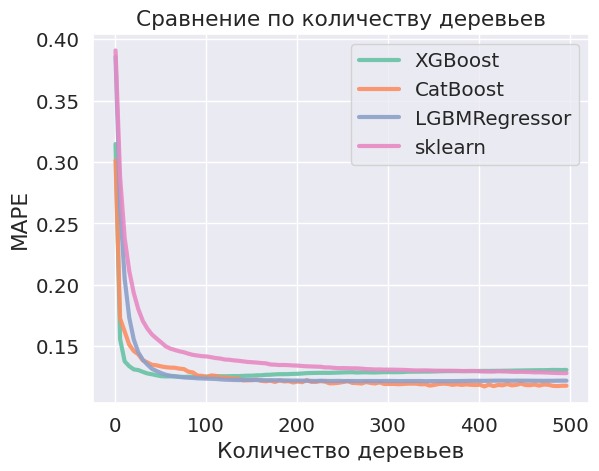

In [ ]:
plot_compare_estimators(['XGBoost', 'CatBoost', 'LightGBM', 'sklearn'], n_estimators_grid, scores, 'Количество деревьев', 'MAPE', 'Сравнение по количеству деревьев')

In [36]:
scores = [[] for _ in range(len(models))]

# Сетка значений глубины деревьев в бустинге
depth_grid = range(1, 16)

for depth in tqdm(depth_grid, leave=False):
    for i, model in enumerate(models):
        # Задаем и обучаем модели
        if model == GradientBoostingRegressor:
            regressor = model(max_depth=depth)
        else:
            regressor = model(max_depth=depth, silent=True)
        regressor.fit(X_train, y_train)

        # Делаем предсказания, считаем и сохраняем метрики
        scores[i].append(mape(regressor.predict(X_test), y_test))

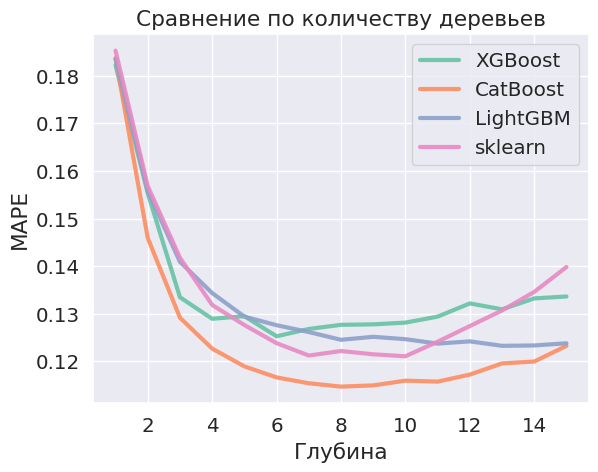

In [38]:
plot_compare_estimators(['XGBoost', 'CatBoost', 'LightGBM', 'sklearn'], depth_grid, scores, 'Глубина', 'MAPE', 'Сравнение по количеству деревьев')

In [18]:
scores = [[] for _ in range(len(models))]

# Сетка значений шага обучения бустинга
learning_rate_grid = np.logspace(-5, 0, 10)

for lr in tqdm(learning_rate_grid, leave=False):
    for i, model in enumerate(models):
        # Задаем и обучаем модели
        if model == GradientBoostingRegressor:
            regressor = model(learning_rate=lr)
        elif model == LGBMRegressor:
            regressor = model(learning_rate=lr, verbosity=-1)
        else:
            regressor = model(learning_rate=lr, silent=True)
        regressor.fit(X_train, y_train)

        # Делаем предсказания, считаем и сохраняем метрики
        scores[i].append(mape(regressor.predict(X_test), y_test))

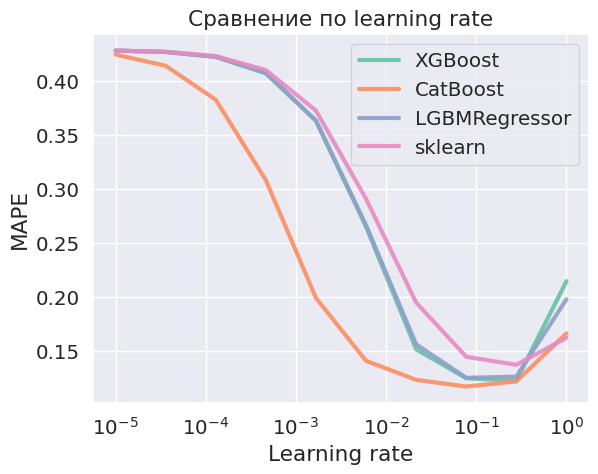

In [ ]:
plot_compare_estimators(['XGBoost', 'CatBoost', 'LightGBM', 'sklearn'], learning_rate_grid, scores, 'Learning rate', 'MAPE', 'Сравнение по learning rate', x_logscale=True)

In [32]:
scores = [[] for _ in range(len(models))]

# Сетка значений шага обучения бустинга
l1_grid = np.linspace(0.01, 1.0, 20)

for l1 in tqdm(l1_grid, leave=False):
    for i, model in enumerate(models):
        # Задаем и обучаем модели
        # Поддерживаются только XGBoost и LightGBM
        if model not in [XGBRegressor, LGBMRegressor]:
            continue

        if model == LGBMRegressor:
            regressor = model(alpha=l1, verbosity=-1)
        else:
            regressor = model(alpha=l1, silent=True)
        regressor.fit(X_train, y_train)

        # Делаем предсказания, считаем и сохраняем метрики
        scores[i].append(mape(regressor.predict(X_test), y_test))

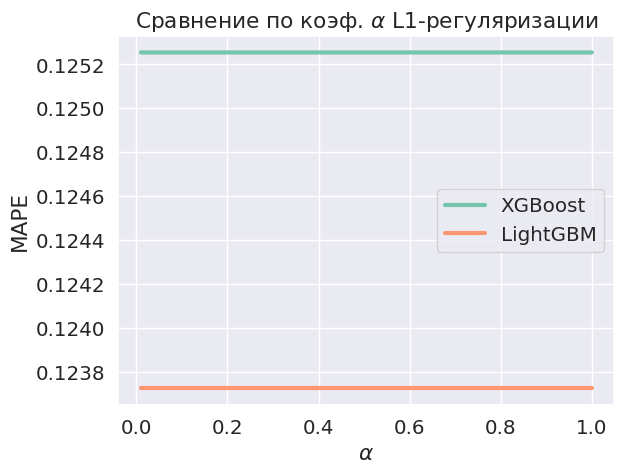

In [33]:
scores = [scores[0], scores[2]]
plot_compare_estimators(['XGBoost', 'LightGBM'], l1_grid, scores, '$\\alpha$', 'MAPE', 'Сравнение по коэф. $\\alpha$ L1-регуляризации')

In [34]:
scores = [[] for _ in range(len(models))]

# Сетка значений шага обучения бустинга
l2_grid = np.linspace(0.01, 1.0, 20)

for l2 in tqdm(l2_grid, leave=False):
    for i, model in enumerate(models):
        # Задаем и обучаем модели
        # Поддерживаются только XGBoost, CatBoost и LightGBM
        if model not in [XGBRegressor, CatBoostRegressor, LGBMRegressor]:
            continue

        if model == LGBMRegressor:
            regressor = model(alpha=l2, verbosity=-1)
        elif model == CatBoostRegressor:
            regressor = model(l2_leaf_reg=l2, silent=True)
        else:
            regressor = model(alpha=l2, silent=True)
        regressor.fit(X_train, y_train)

        # Делаем предсказания, считаем и сохраняем метрики
        scores[i].append(mape(regressor.predict(X_test), y_test))

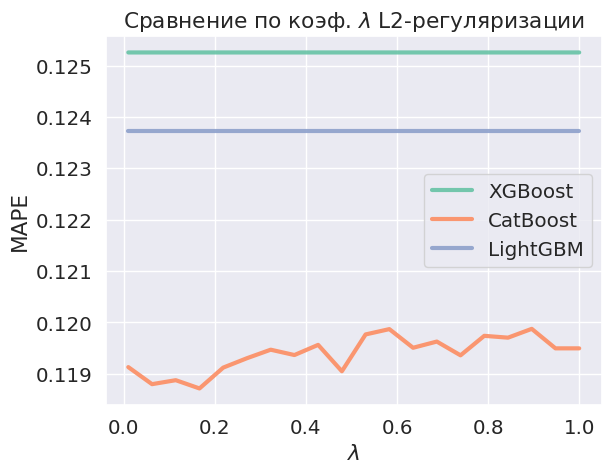

In [35]:
scores = scores[:-1]
plot_compare_estimators(['XGBoost', 'CatBoost', 'LightGBM'], l1_grid, scores, '$\\lambda$', 'MAPE', 'Сравнение по коэф. $\\lambda$ L2-регуляризации')

Из графиков определим оптимальные значения гиперпараметров:

| Параметр            | XGBoost | CatBoost | LightGBM | sklearn |
|---------------------|---------|----------|----------|---------|
| Количество деревьев | 50      | 100      | 75       | 250     |
| Макс. глубина       | 6       | 8        | 8        | 10      |
| learning rate       | 0.1     | 0.1      | 0.1      | 0.3     |
| $\alpha$            | 0.0     | -        | 0.0      | -       |
| $\lambda$           | 0.0     | 0.1      | 0.0      | -       |

Отметим, что в нашей задаче регуляризация на качество практически не влияет, за исключением L2-регуляризации у CatBoost (но и тут влияние на качество мало).

**2.** Нарисуйте по несколько деревьев каждой из моделей с помощью функций `plot_tree`, которая реализована в каждой из библиотек. Для этого потребуется немного разобраться с тем, как работают эти функции. 

Какие особенности можно заметить? Как меняются деревья при изменении максимальной глубины? Что выдает CatBoost в листе, если в него не попали объекты обучающей выборки?

**3.** Исследуйте среднее время обучения и предсказания для разных моделей. Для более честного сравнения для каждой модели стоит использовать те значения гиперпараметров, которые для нее оптимальны.

In [42]:
from time import time

xgb_model = XGBRegressor(n_estimators=50, learning_rate=0.1, max_depth=6, silent=True)
cat_model = CatBoostRegressor(n_estimators=100, learning_rate=0.1, max_depth=8, l2_leaf_reg=0.1, silent=True)
lgbm_model = LGBMRegressor(n_estimators=75, learning_rate=0.1, max_depth=8, verbosity=-1)
sklearn_model = GradientBoostingRegressor(n_estimators=250, learning_rate=0.3, max_depth=10)

n_iter = 20
models = [xgb_model, cat_model, lgbm_model, sklearn_model]
times_learn = [[] for _ in range(len(models))]
times_predict = [[] for _ in range(len(models))]
for i in tqdm(range(n_iter)):
    for j, model in enumerate(models):
        t = []
        t.append(time())
        model.fit(X_train, y_train)
        t.append(time())
        model.predict(X_train)
        t.append(time())
        times_learn[j].append(t[1] - t[0])
        times_predict[j].append(t[2] - t[1])

100%|██████████| 20/20 [23:02<00:00, 69.14s/it]


In [44]:
model_names = ['XGBoost', 'CatBoost', 'LightGBM', 'sklearn']
print('=== Среднее время обучения (с) ===')
for i, name in enumerate(model_names):
    print('%s: %.2f' % (name, np.mean(times_learn[i])))
print('=== Среднее время предсказания (с) ===')
for i, name in enumerate(model_names):
    print('%s: %.2f' % (name, np.mean(times_predict[i])))

=== Среднее время обучения (с) ===
XGBoost: 9.22
CatBoost: 1.22
LightGBM: 0.60
sklearn: 57.70
=== Среднее время предсказания (с) ===
XGBoost: 0.07
CatBoost: 0.01
LightGBM: 0.05
sklearn: 0.28


**Выводы:** Быстрее всех работает модель LightGBM, но ценой снижения качества. Немного отстаёт по времени обучения CatBoost, но качество этой модели, исходя из графиков, несколько лучше. Намного дольше работает алгоритм из sklearn, его качество также уступает остальным.

---
### Задача 3

В продолжении исследований из предыдущей задачи выберите некоторое количество хороших на ваш взгляд моделей, постройте для них предсказание на тестовой выборке. Полученные предсказания отправьте в тренировочное соревнование на Kaggle.

Ссылка: https://www.kaggle.com/competitions/ds-2024-autumn-36

Инвайт: https://www.kaggle.com/t/a58c055b57ac4a04b857ad11fe607333

**Правила**

* В Kaggle в данное тренировочное соревнование можно отправлять не более 7 решений в день (8-ю система не позволит).
* Решения индивидуальные.
* Качество считается по метрике MAPE.
* До окончания соревнования доступны значения качества, посчитанные только на случайных 30% тестовых данных. Значения отображаются в Public Leaderboard
* После окончания соревнования становится доступным Private Leaderboard, в котором значения качества посчитанны на оставшихся 70% объектов.
* Для включения в Private Leaderboard можно выбрать две посылки.
* В Leaderboard должны отображаться ваши **реальные имя и фамилия**. В противном случае решение может быть не зачтено.
* Все файлы, которые вы отправляете в соревнование, видны организаторам соревнования. Файлы должны иметь понятное имя, при отправке файла в систему необходимо написать краткое описание решения. **Это будет проверяться.**
* В решении, отправляемом боту, должно быть отображено, результаты каких моделей вы отправляете в соревнование.
* Не забывайте сделать пояснения к своему решению. **Решение может быть не зачтено, если в нем недостаточно пояснений**, даже если удалось попасть в топ-3.
* Пользоваться можно любыми пройденными в наших курсах моделями.
* Нельзя пользоваться любыми методами и моделями, которые мы не проходили, и которых не было в ранее в иных курсах, которые обязательны для всех.
* Код студентов, занявших первые 3 места, будет запускаться. Также выборочно может запускаться код и остальных студентов.

**Сроки сдачи**
 
* **Дедлайн в Kaggle** совпадает с дедлайном по заданию. Дедлайн строгий, Kaggle не позволит сдать даже на секунду позже.
* Также **до дедлайна необходимо сдать в бот** существующий вариант решения, возможно, без пояснений.
* **До 23:59 следующих суток** необходимо дооформить решение, соответствующее наилучшему варианту по Private Leaderboard и сдать в бот по отдельной кнопке. **Решение может быть не зачтено, если в нем недостаточно пояснений**, даже если удалось попасть в топ-3.
* В случае, если вы до основного дедлайна сдаете оформленное решение, его нужно сдать по двум кнопкам сразу &mdash; соответствующей основной сдаче, и отдельной для оформленного решения.

**Советы**

* Чтобы получить действительно хороший результат подбора гиперпараметров мало, попробуйте ввести новые признаки для улучшения качества решения.
* Некоторые инсайты по тому, какие признаки могут улучшить качество, можно получить если провести разведывательный анализ данных (EDA). Например, может иметь смысл изучить датасет на предмет наличия выбросов, исследовать пространственное и временное распределение отклика. 
* Сохраняйте код и результаты каждой модели в отдельных файлах. Добавляйте к ним понятные описания, которые помогут вам при необходимости продолжить использовать решение.

**Бонусы**

* **Выдаются только при соблюдении всех правил** и суммируются.
* 15 баллов — ваше решение лучше `sample_submission.csv` на Private Leaderboard.
* 15 баллов — ваше решение имеет ошибку не более 12.3% по метрике MAPE на Private Leaderboard.
* 1 конфета — попадание в топ-10 на Private Leaderboard.
* 1 средняя конфета — попадание в топ-3 на Private Leaderboard.
* 1 большая конфета — попадание в топ-1 на Private Leaderboard.

In [54]:
# Воспользуемся ранее обученной с оптимальными параметрами моделью CatBoost
cat_model = CatBoostRegressor(n_estimators=100, learning_rate=0.1, max_depth=8, l2_leaf_reg=0.1, silent=True)
cat_model.fit(X, y)
houses_test = pd.read_csv('houses_test.csv')
result = pd.DataFrame({'index': np.arange(len(houses_test)) + 1, 'price': cat_model.predict(houses_test[features])})
result.to_csv('result.csv', index=False)

In [55]:
# Воспользуемся ранее обученной с оптимальными параметрами моделью XGBoost
xgb_model = XGBRegressor(n_estimators=50, learning_rate=0.1, max_depth=6, silent=True)
xgb_model.fit(X, y)
houses_test = pd.read_csv('houses_test.csv')
result = pd.DataFrame({'index': np.arange(len(houses_test)) + 1, 'price': xgb_model.predict(houses_test[features])})
result.to_csv('result2.csv', index=False)

In [59]:
from sklearn.model_selection import GridSearchCV

model = GridSearchCV(
    estimator=CatBoostRegressor(n_estimators=80),
    param_grid={
        'max_depth': np.linspace(6, 12, 4),
        'learning_rate': np.logspace(-3, 0, 4),
        'l2_leaf_reg': np.linspace(0.01, 1.0, 10)
    },
    cv=5,
    n_jobs=-1)
model.fit(X, y)

47413.83s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
47414.02s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
47414.20s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
47414.39s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
47414.57s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
47414.76s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
47414.95s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
47415.13s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
47415.32s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
47415.51s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
47415.69s - pydevd: Sending message rela

0:	learn: 350911.1383300	total: 77.1ms	remaining: 6.09s
1:	learn: 350704.4391646	total: 111ms	remaining: 4.31s
2:	learn: 350472.0500481	total: 121ms	remaining: 3.09s
3:	learn: 350251.5942552	total: 129ms	remaining: 2.46s
4:	learn: 350020.9886657	total: 166ms	remaining: 2.49s
5:	learn: 349793.7094906	total: 211ms	remaining: 2.6s
6:	learn: 349561.5650244	total: 250ms	remaining: 2.6s
7:	learn: 349335.1780705	total: 283ms	remaining: 2.55s
8:	learn: 349113.1919385	total: 321ms	remaining: 2.54s
9:	learn: 348891.5672872	total: 365ms	remaining: 2.56s
10:	learn: 348674.8633562	total: 385ms	remaining: 2.42s
11:	learn: 348448.0296192	total: 408ms	remaining: 2.31s
0:	learn: 364525.0428989	total: 91.3ms	remaining: 7.21s
1:	learn: 364293.7839599	total: 117ms	remaining: 4.56s
12:	learn: 348217.7383037	total: 456ms	remaining: 2.35s
2:	learn: 364062.6795686	total: 134ms	remaining: 3.45s
13:	learn: 347997.1528736	total: 481ms	remaining: 2.27s
3:	learn: 363834.3377696	total: 157ms	remaining: 2.98s
14:	le

47518.38s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


39:	learn: 50169.6484181	total: 14.5s	remaining: 14.5s
56:	learn: 76683.3631707	total: 46.9s	remaining: 18.9s
63:	learn: 37950.6837850	total: 19.3s	remaining: 4.81s
64:	learn: 336968.4097158	total: 3.91s	remaining: 903ms
65:	learn: 336753.3167151	total: 3.94s	remaining: 836ms
8:	learn: 82185.3417843	total: 5.96s	remaining: 47s
60:	learn: 39992.9971662	total: 19s	remaining: 5.93s
64:	learn: 72762.4471779	total: 49.4s	remaining: 11.4s
66:	learn: 336543.2977333	total: 3.97s	remaining: 770ms
60:	learn: 38407.6595515	total: 18.1s	remaining: 5.64s
15:	learn: 62344.4979966	total: 9.73s	remaining: 38.9s
40:	learn: 49439.0167675	total: 14.8s	remaining: 14.1s
59:	learn: 41985.0943645	total: 18.7s	remaining: 6.22s
56:	learn: 77067.7117608	total: 47.7s	remaining: 19.3s
67:	learn: 336328.4209178	total: 4.11s	remaining: 725ms
9:	learn: 79398.2832998	total: 6.96s	remaining: 48.7s
61:	learn: 39244.3120910	total: 19.2s	remaining: 5.58s
61:	learn: 37970.5099340	total: 18.3s	remaining: 5.31s
64:	learn: 3

47520.63s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


68:	learn: 71117.9192771	total: 51.7s	remaining: 8.24s
12:	learn: 68625.2932691	total: 8.34s	remaining: 43s
67:	learn: 38147.8332065	total: 20.8s	remaining: 3.68s
59:	learn: 75671.5679892	total: 49.9s	remaining: 16.6s
54:	learn: 76175.4862728	total: 46.2s	remaining: 21s
26:	learn: 348541.2367014	total: 1.14s	remaining: 2.24s
46:	learn: 45564.6265173	total: 17s	remaining: 12s
27:	learn: 348310.5525040	total: 1.19s	remaining: 2.21s
19:	learn: 54826.8963651	total: 12s	remaining: 36.1s
68:	learn: 35381.1128154	total: 20.5s	remaining: 3.27s
28:	learn: 348084.6871966	total: 1.31s	remaining: 2.31s
61:	learn: 74498.7318470	total: 49.6s	remaining: 14.4s
72:	learn: 34383.1117662	total: 21.9s	remaining: 2.1s
68:	learn: 36300.0907886	total: 21.6s	remaining: 3.44s
73:	learn: 33961.5005281	total: 22s	remaining: 1.78s
29:	learn: 347851.8819938	total: 1.42s	remaining: 2.36s
14:	learn: 67155.7332302	total: 11.6s	remaining: 50.2s
68:	learn: 37804.9439244	total: 21.2s	remaining: 3.38s
30:	learn: 347618.4

47523.42s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


78:	learn: 31835.7209145	total: 22.7s	remaining: 288ms
59:	learn: 341094.7751408	total: 3.5s	remaining: 1.17s
60:	learn: 340871.7586548	total: 3.51s	remaining: 1.09s
76:	learn: 33379.1331546	total: 23.8s	remaining: 929ms
72:	learn: 69678.6821396	total: 54.2s	remaining: 5.2s
0:	learn: 364526.3950341	total: 16.1ms	remaining: 1.27s
55:	learn: 40808.7409521	total: 19.5s	remaining: 8.38s
61:	learn: 340651.0958569	total: 3.58s	remaining: 1.04s
16:	learn: 61781.5631305	total: 12.8s	remaining: 47.5s
65:	learn: 72873.4940823	total: 52s	remaining: 11s
1:	learn: 364296.1445831	total: 41.3ms	remaining: 1.61s
63:	learn: 73660.1839038	total: 52.5s	remaining: 13.1s
62:	learn: 340436.8375530	total: 3.62s	remaining: 978ms
58:	learn: 74783.5907028	total: 48.8s	remaining: 17.4s
16:	learn: 61974.1525800	total: 11.8s	remaining: 43.6s
76:	learn: 35225.4976535	total: 23.5s	remaining: 917ms
79:	learn: 31422.7807420	total: 23s	remaining: 0us
2:	learn: 364068.2765623	total: 182ms	remaining: 4.66s
63:	learn: 737

47526.71s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


66:	learn: 36758.9847218	total: 22.5s	remaining: 4.37s
42:	learn: 354692.7177323	total: 3s	remaining: 2.58s
43:	learn: 354467.4841801	total: 3.01s	remaining: 2.46s
5:	learn: 363214.0876545	total: 841ms	remaining: 10.4s
12:	learn: 347966.3172629	total: 2.2s	remaining: 11.3s
44:	learn: 354236.7892940	total: 3.05s	remaining: 2.38s
21:	learn: 53138.8638665	total: 14.8s	remaining: 39s
45:	learn: 354002.6629465	total: 3.08s	remaining: 2.27s
46:	learn: 353778.0176418	total: 3.09s	remaining: 2.17s
10:	learn: 351992.7586034	total: 1.57s	remaining: 9.84s
47:	learn: 353541.6660874	total: 3.12s	remaining: 2.08s
25:	learn: 358846.8321497	total: 1.69s	remaining: 3.51s
48:	learn: 353308.3485678	total: 3.15s	remaining: 1.99s
21:	learn: 54084.8700058	total: 17s	remaining: 44.9s
21:	learn: 51698.6929411	total: 14.1s	remaining: 37.3s
49:	learn: 353092.1747340	total: 3.21s	remaining: 1.92s
13:	learn: 347724.5524156	total: 2.38s	remaining: 11.2s
28:	learn: 44092.1572366	total: 17.8s	remaining: 31.3s
11:	le

47541.34s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


47:	learn: 339101.9052293	total: 12.2s	remaining: 8.1s
22:	learn: 354931.5982814	total: 6.38s	remaining: 15.8s
35:	learn: 355134.7322253	total: 9.79s	remaining: 12s
40:	learn: 344153.6062822	total: 11.9s	remaining: 11.3s
6:	learn: 362809.4962715	total: 4.15s	remaining: 43.2s
8:	learn: 363016.2983082	total: 4.76s	remaining: 37.5s
46:	learn: 31065.7704779	total: 29.7s	remaining: 20.8s
44:	learn: 31653.7063902	total: 31.9s	remaining: 24.8s
10:	learn: 348215.1374272	total: 6.57s	remaining: 41.2s
48:	learn: 338858.9750516	total: 12.5s	remaining: 7.88s
36:	learn: 354868.5572904	total: 10.1s	remaining: 11.7s
8:	learn: 352281.7494291	total: 5.33s	remaining: 42.1s
44:	learn: 31041.3043580	total: 31.1s	remaining: 24.2s
47:	learn: 28142.8565716	total: 29.2s	remaining: 19.4s
23:	learn: 354663.1525971	total: 6.73s	remaining: 15.7s
51:	learn: 27612.6898847	total: 32.7s	remaining: 17.6s
41:	learn: 343892.2299620	total: 12.2s	remaining: 11.1s
7:	learn: 362529.5827542	total: 4.56s	remaining: 41.1s
49:	

47543.97s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


45:	learn: 352535.8002037	total: 12.2s	remaining: 9.01s
49:	learn: 341911.3034721	total: 14.2s	remaining: 8.54s
56:	learn: 336890.6186390	total: 14.7s	remaining: 5.93s
12:	learn: 351201.8314555	total: 7.46s	remaining: 38.4s
31:	learn: 352540.6128626	total: 8.9s	remaining: 13.4s
46:	learn: 352275.1451528	total: 12.4s	remaining: 8.68s
47:	learn: 28493.6692862	total: 33.4s	remaining: 22.3s
51:	learn: 26349.6746348	total: 31.5s	remaining: 17s
50:	learn: 341657.6742571	total: 14.5s	remaining: 8.26s
47:	learn: 352013.0745451	total: 12.5s	remaining: 8.33s
57:	learn: 336643.0540088	total: 15s	remaining: 5.69s
48:	learn: 29412.8374622	total: 34.5s	remaining: 21.8s
13:	learn: 361625.7051533	total: 7.5s	remaining: 35.4s
32:	learn: 352275.4938756	total: 9.19s	remaining: 13.1s
11:	learn: 361434.4333703	total: 7.01s	remaining: 39.7s
51:	learn: 341407.2045041	total: 14.7s	remaining: 7.94s
55:	learn: 25669.6635741	total: 35.3s	remaining: 15.1s
51:	learn: 28550.5390141	total: 32.6s	remaining: 17.5s
15:

47550.59s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


10:	learn: 358201.5796771	total: 1.69s	remaining: 10.6s
8:	learn: 331584.8837775	total: 615ms	remaining: 4.85s
2:	learn: 364735.1588912	total: 954ms	remaining: 24.5s
71:	learn: 345911.6277483	total: 18.9s	remaining: 2.1s
35:	learn: 357035.4455730	total: 2.35s	remaining: 2.88s
74:	learn: 335690.5270521	total: 21s	remaining: 1.4s
36:	learn: 356797.7917299	total: 2.36s	remaining: 2.75s
37:	learn: 356554.2365571	total: 2.38s	remaining: 2.63s
9:	learn: 329563.0307149	total: 748ms	remaining: 5.23s
38:	learn: 356322.2993865	total: 2.4s	remaining: 2.52s
39:	learn: 356087.2709988	total: 2.4s	remaining: 2.4s
40:	learn: 355866.8397411	total: 2.42s	remaining: 2.3s
41:	learn: 355637.0774138	total: 2.43s	remaining: 2.2s
11:	learn: 357951.2216602	total: 1.88s	remaining: 10.7s
42:	learn: 355405.7659886	total: 2.44s	remaining: 2.1s
57:	learn: 345884.2222715	total: 15.6s	remaining: 5.91s
43:	learn: 355177.2080919	total: 2.46s	remaining: 2.01s
10:	learn: 327611.6119148	total: 832ms	remaining: 5.22s
44:	l

47575.58s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


76:	learn: 105421.7179919	total: 5.54s	remaining: 216ms
14:	learn: 313722.8335628	total: 10.9s	remaining: 47.2s
4:	learn: 262822.5951775	total: 440ms	remaining: 6.61s
9:	learn: 334501.3283050	total: 6.68s	remaining: 46.8s
58:	learn: 349410.8693805	total: 38.7s	remaining: 13.8s
60:	learn: 335272.9742247	total: 40.3s	remaining: 12.6s
21:	learn: 354921.6042118	total: 14.5s	remaining: 38.2s
62:	learn: 231921.0420242	total: 17.2s	remaining: 4.64s
43:	learn: 265190.8735532	total: 11.6s	remaining: 9.51s
77:	learn: 105073.1643825	total: 5.65s	remaining: 145ms
5:	learn: 250589.8064194	total: 524ms	remaining: 6.46s
6:	learn: 238154.3606419	total: 540ms	remaining: 5.63s
7:	learn: 226948.8802453	total: 575ms	remaining: 5.18s
8:	learn: 217056.7977196	total: 587ms	remaining: 4.63s
78:	learn: 104966.7847935	total: 5.73s	remaining: 72.5ms
44:	learn: 267034.7197659	total: 14.5s	remaining: 11.3s
79:	learn: 104855.1626832	total: 5.78s	remaining: 0us
56:	learn: 239348.5007993	total: 17.6s	remaining: 7.1s


47600.59s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


rn: 95097.8460668	total: 13.4s	remaining: 9.87s
5:	learn: 233810.3232241	total: 4.91s	remaining: 1m
44:	learn: 81469.9498526	total: 1.88s	remaining: 1.46s
50:	learn: 252519.4795483	total: 34.3s	remaining: 19.5s
45:	learn: 80765.0194455	total: 2.01s	remaining: 1.49s
44:	learn: 259238.8349170	total: 31.9s	remaining: 24.8s
46:	learn: 80183.0238509	total: 2.04s	remaining: 1.43s
47:	learn: 79765.8359100	total: 2.06s	remaining: 1.37s
35:	learn: 100781.8339336	total: 10.7s	remaining: 13.1s
36:	learn: 100701.9179131	total: 10.8s	remaining: 12.5s
48:	learn: 255058.3512273	total: 33.2s	remaining: 21s
52:	learn: 91647.2833631	total: 14.3s	remaining: 7.27s
46:	learn: 94726.9271904	total: 13.7s	remaining: 9.61s
10:	learn: 169277.7569439	total: 8.02s	remaining: 50.3s
36:	learn: 101590.2409946	total: 12.5s	remaining: 14.5s
48:	learn: 79101.6992705	total: 2.24s	remaining: 1.42s
47:	learn: 249804.6461108	total: 36s	remaining: 24s
13:	learn: 144932.6339523	total: 9.49s	remaining: 44.7s
56:	learn: 233805

47606.44s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


39:	learn: 121473.7258124	total: 3.39s	remaining: 3.39s
17:	learn: 125031.0611856	total: 13.2s	remaining: 45.6s
12:	learn: 153713.0278919	total: 9.86s	remaining: 50.8s
40:	learn: 120659.7081066	total: 3.4s	remaining: 3.24s
41:	learn: 119666.6023814	total: 3.42s	remaining: 3.09s
28:	learn: 92320.4313828	total: 2.42s	remaining: 4.25s
42:	learn: 119036.4106614	total: 3.42s	remaining: 2.94s
55:	learn: 243355.2026047	total: 38.5s	remaining: 16.5s
43:	learn: 118479.4048088	total: 3.46s	remaining: 2.83s
51:	learn: 91670.1642725	total: 16.1s	remaining: 8.68s
21:	learn: 111530.6540222	total: 14.7s	remaining: 38.7s
29:	learn: 91737.3836133	total: 2.5s	remaining: 4.17s
64:	learn: 86949.1722568	total: 19s	remaining: 4.39s
44:	learn: 118070.4878350	total: 3.57s	remaining: 2.78s
14:	learn: 143043.3132461	total: 10.9s	remaining: 47.2s
13:	learn: 148953.1337079	total: 10.6s	remaining: 50.1s
45:	learn: 117528.0030526	total: 3.65s	remaining: 2.7s
46:	learn: 116887.8205358	total: 3.67s	remaining: 2.58s
5

47627.65s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


33:	learn: 55072.9044684	total: 10.1s	remaining: 13.6s
47:	learn: 82541.6640600	total: 34.6s	remaining: 23.1s
3:	learn: 350258.5523761	total: 333ms	remaining: 6.33s
4:	learn: 350028.6766893	total: 349ms	remaining: 5.24s
23:	learn: 66085.8741182	total: 7.23s	remaining: 16.9s
5:	learn: 349803.0841243	total: 368ms	remaining: 4.54s
6:	learn: 349572.7792986	total: 382ms	remaining: 3.98s
40:	learn: 49119.0678774	total: 12.5s	remaining: 11.9s
7:	learn: 349347.8831151	total: 393ms	remaining: 3.53s
46:	learn: 84153.4303659	total: 32.1s	remaining: 22.6s
26:	learn: 59537.5288774	total: 8.23s	remaining: 16.2s
8:	learn: 349126.2979707	total: 454ms	remaining: 3.58s
5:	learn: 97823.1646807	total: 3.7s	remaining: 45.6s
9:	learn: 348905.6661910	total: 524ms	remaining: 3.67s
0:	learn: 173078.7382459	total: 951ms	remaining: 1m 15s
34:	learn: 54251.0263068	total: 10.3s	remaining: 13.3s
19:	learn: 73043.7360294	total: 5.57s	remaining: 16.7s
5:	learn: 99123.9392373	total: 5.12s	remaining: 1m 3s
41:	learn: 4

47633.18s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


47:	learn: 43528.4193331	total: 13.5s	remaining: 9.01s
61:	learn: 37703.5897404	total: 18s	remaining: 5.23s
7:	learn: 89150.3748652	total: 6.33s	remaining: 57s
53:	learn: 42686.2293760	total: 15.7s	remaining: 7.58s
34:	learn: 55394.8292715	total: 11s	remaining: 14.1s
55:	learn: 78541.0586536	total: 37.5s	remaining: 16.1s
55:	learn: 79707.1573014	total: 37.8s	remaining: 16.2s
48:	learn: 42989.7799381	total: 13.8s	remaining: 8.76s
56:	learn: 78233.6618172	total: 40.4s	remaining: 16.3s
12:	learn: 71642.1321116	total: 9.83s	remaining: 50.6s
35:	learn: 54637.7225204	total: 11.1s	remaining: 13.6s
41:	learn: 50604.1517853	total: 13s	remaining: 11.8s
13:	learn: 68029.0912741	total: 9.38s	remaining: 44.2s
13:	learn: 70021.6656305	total: 10.8s	remaining: 50.8s
62:	learn: 37456.0144158	total: 18.4s	remaining: 4.96s
0:	learn: 365305.9752160	total: 139ms	remaining: 11s
36:	learn: 53910.6049016	total: 11.2s	remaining: 13s
54:	learn: 42312.3592962	total: 16s	remaining: 7.29s
61:	learn: 75188.0719494	

47661.03s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


35:	learn: 351641.4480845	total: 10.4s	remaining: 12.7s
10:	learn: 361775.1857370	total: 7.41s	remaining: 46.5s
73:	learn: 338131.5048112	total: 3.6s	remaining: 292ms
3:	learn: 345710.7614476	total: 97ms	remaining: 1.84s
79:	learn: 228183.1961699	total: 6.13s	remaining: 0us
13:	learn: 350991.8833346	total: 8.88s	remaining: 41.8s
74:	learn: 337913.5495108	total: 3.66s	remaining: 244ms
75:	learn: 337707.0802644	total: 3.67s	remaining: 193ms
41:	learn: 353748.2261292	total: 12.3s	remaining: 11.1s
76:	learn: 337496.2389997	total: 3.69s	remaining: 144ms
77:	learn: 337276.2229813	total: 3.69s	remaining: 94.8ms
78:	learn: 337059.7978328	total: 3.71s	remaining: 46.9ms
50:	learn: 27285.9402507	total: 36.8s	remaining: 20.9s
79:	learn: 336851.8571625	total: 3.72s	remaining: 0us
4:	learn: 343401.8707224	total: 236ms	remaining: 3.54s
47:	learn: 353039.3244632	total: 12.9s	remaining: 8.62s
57:	learn: 336824.1909061	total: 17.6s	remaining: 6.68s
48:	learn: 352781.2708082	total: 13s	remaining: 8.25s
5

47663.90s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


31:	learn: 300436.6267470	total: 2.02s	remaining: 3.04s
32:	learn: 298668.5864900	total: 2.06s	remaining: 2.94s
33:	learn: 296980.4236664	total: 2.09s	remaining: 2.82s
34:	learn: 295258.7932911	total: 2.12s	remaining: 2.72s
44:	learn: 271534.6594858	total: 2.86s	remaining: 2.23s
35:	learn: 293568.1780277	total: 2.13s	remaining: 2.61s
28:	learn: 305075.3522930	total: 2.06s	remaining: 3.62s
65:	learn: 334889.6177687	total: 20.3s	remaining: 4.31s
36:	learn: 291879.2669684	total: 2.15s	remaining: 2.5s
37:	learn: 290321.7763715	total: 2.16s	remaining: 2.39s
38:	learn: 288675.4472659	total: 2.2s	remaining: 2.31s
45:	learn: 270144.2213561	total: 2.94s	remaining: 2.18s
29:	learn: 303349.2391390	total: 2.14s	remaining: 3.57s
39:	learn: 286998.5095310	total: 2.23s	remaining: 2.23s
40:	learn: 285455.2109950	total: 2.24s	remaining: 2.13s
41:	learn: 283914.1892779	total: 2.25s	remaining: 2.04s
45:	learn: 349097.1365252	total: 13.4s	remaining: 9.9s
46:	learn: 268723.8940814	total: 3s	remaining: 2.11

47724.53s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


55:	learn: 245395.6638577	total: 43.5s	remaining: 18.6s
67:	learn: 72832.9165636	total: 4.66s	remaining: 823ms
8:	learn: 112745.2372372	total: 610ms	remaining: 4.81s
68:	learn: 72538.2960361	total: 4.67s	remaining: 745ms
71:	learn: 84240.8962425	total: 20.8s	remaining: 2.32s
17:	learn: 90464.9060062	total: 1.99s	remaining: 6.85s
69:	learn: 72275.8151827	total: 4.69s	remaining: 670ms
18:	learn: 88861.0021182	total: 2s	remaining: 6.43s
16:	learn: 92948.8983356	total: 2.87s	remaining: 10.6s
59:	learn: 240203.8366136	total: 43.7s	remaining: 14.6s
19:	learn: 87509.4901204	total: 2.02s	remaining: 6.06s
56:	learn: 241115.3579051	total: 43.1s	remaining: 17.4s
77:	learn: 83385.2666415	total: 24.1s	remaining: 617ms
70:	learn: 72038.2347811	total: 4.74s	remaining: 601ms
20:	learn: 85508.6548238	total: 2.13s	remaining: 5.98s
59:	learn: 232343.3544281	total: 45.9s	remaining: 15.3s
60:	learn: 229856.1356918	total: 46.1s	remaining: 14.3s
19:	learn: 120146.5205281	total: 15.4s	remaining: 46.2s
71:	lea

47727.50s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


9:	learn: 113787.8323913	total: 1.65s	remaining: 11.5s
2:	learn: 126561.0688212	total: 826ms	remaining: 21.2s
10:	learn: 105462.1577512	total: 1.65s	remaining: 10.4s
22:	learn: 84719.6785676	total: 2.98s	remaining: 7.37s
34:	learn: 71775.1715870	total: 4.38s	remaining: 5.63s
32:	learn: 73112.8155970	total: 5.25s	remaining: 7.48s
58:	learn: 240654.0250508	total: 46s	remaining: 16.4s
64:	learn: 224102.1244211	total: 48.4s	remaining: 11.2s
10:	learn: 111581.4699400	total: 1.83s	remaining: 11.5s
11:	learn: 101756.7322334	total: 1.78s	remaining: 10.1s
26:	learn: 103006.4390767	total: 19.8s	remaining: 38.8s
78:	learn: 82422.8503700	total: 23.4s	remaining: 296ms
35:	learn: 71155.5436529	total: 4.51s	remaining: 5.51s
23:	learn: 83313.2565844	total: 3.12s	remaining: 7.28s
26:	learn: 104358.2241118	total: 19.1s	remaining: 37.6s
63:	learn: 234044.9584012	total: 46.3s	remaining: 11.6s
12:	learn: 99901.2637509	total: 1.87s	remaining: 9.65s
3:	learn: 113735.2648438	total: 1.12s	remaining: 21.3s
30:	

47730.49s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


11:	learn: 85238.6614804	total: 3.65s	remaining: 20.7s
26:	learn: 80156.7024856	total: 4.38s	remaining: 8.59s
40:	learn: 70146.2591445	total: 5.77s	remaining: 5.49s
30:	learn: 98026.1027923	total: 21.8s	remaining: 34.5s
6:	learn: 107552.5793324	total: 2.1s	remaining: 21.9s
12:	learn: 82109.7051474	total: 3.77s	remaining: 19.5s
63:	learn: 232979.2990925	total: 48.9s	remaining: 12.2s
27:	learn: 78985.9918008	total: 4.55s	remaining: 8.45s
60:	learn: 57527.6996784	total: 8.18s	remaining: 2.55s
59:	learn: 57659.2171476	total: 7.31s	remaining: 2.44s
41:	learn: 69592.1399051	total: 5.93s	remaining: 5.37s
35:	learn: 72759.4350225	total: 4.74s	remaining: 5.8s
61:	learn: 57145.3342159	total: 8.3s	remaining: 2.41s
28:	learn: 78036.9283832	total: 4.7s	remaining: 8.26s
7:	learn: 101580.3039459	total: 2.32s	remaining: 20.8s
29:	learn: 77208.2116436	total: 4.73s	remaining: 7.89s
62:	learn: 56767.2118372	total: 8.33s	remaining: 2.25s
30:	learn: 76489.8104869	total: 4.79s	remaining: 7.58s
63:	learn: 56

47747.21s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


63:	learn: 39262.1965093	total: 18.5s	remaining: 4.63s
39:	learn: 356168.3675829	total: 2.57s	remaining: 2.57s
10:	learn: 362192.5935913	total: 936ms	remaining: 5.87s
40:	learn: 355950.3258496	total: 2.58s	remaining: 2.46s
41:	learn: 355729.9137398	total: 2.59s	remaining: 2.35s
42:	learn: 355499.3293013	total: 2.6s	remaining: 2.24s
43:	learn: 355272.1517767	total: 2.62s	remaining: 2.14s
19:	learn: 56065.4729615	total: 13.1s	remaining: 39.3s
11:	learn: 361954.6809228	total: 981ms	remaining: 5.56s
54:	learn: 80115.0090827	total: 40.4s	remaining: 18.4s
41:	learn: 48271.8916369	total: 13.1s	remaining: 11.9s
53:	learn: 80473.5580805	total: 39.2s	remaining: 18.9s
44:	learn: 355043.6526222	total: 2.67s	remaining: 2.07s
58:	learn: 40483.4074822	total: 20.3s	remaining: 7.22s
11:	learn: 75090.9870065	total: 8.27s	remaining: 46.9s
45:	learn: 354806.6128272	total: 2.69s	remaining: 1.99s
12:	learn: 361723.2692985	total: 1.09s	remaining: 5.61s
46:	learn: 354581.2378361	total: 2.72s	remaining: 1.91s


47750.32s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


27:	learn: 354566.2078776	total: 2.55s	remaining: 4.73s
8:	learn: 348969.4441812	total: 1.36s	remaining: 10.7s
55:	learn: 79859.2240358	total: 40.3s	remaining: 17.3s
50:	learn: 352949.2869713	total: 4.1s	remaining: 2.33s
51:	learn: 352727.5761109	total: 4.21s	remaining: 2.27s
9:	learn: 348733.6104801	total: 1.55s	remaining: 10.9s
16:	learn: 63075.7128261	total: 11.5s	remaining: 42.7s
69:	learn: 35804.3220753	total: 23.5s	remaining: 3.36s
28:	learn: 354338.0215757	total: 2.82s	remaining: 4.96s
76:	learn: 34273.3338547	total: 22s	remaining: 858ms
70:	learn: 35463.2073245	total: 23.7s	remaining: 3s
10:	learn: 348502.7957597	total: 1.73s	remaining: 10.9s
58:	learn: 79076.3580777	total: 42s	remaining: 15s
54:	learn: 40581.5853032	total: 16.7s	remaining: 7.57s
59:	learn: 77693.7245369	total: 44s	remaining: 14.7s
64:	learn: 75515.1487604	total: 45.1s	remaining: 10.4s
59:	learn: 77575.4421781	total: 42.8s	remaining: 14.3s
11:	learn: 348255.8268431	total: 1.82s	remaining: 10.3s
52:	learn: 35251

48035.23s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


58:	learn: 39599.5577558	total: 22.7s	remaining: 8.2s
22:	learn: 51389.1843203	total: 20.1s	remaining: 49.8s
62:	learn: 339041.7415858	total: 4m 40s	remaining: 1m 15s
42:	learn: 353659.1699298	total: 14.1s	remaining: 12.1s
10:	learn: 358060.5134670	total: 8.17s	remaining: 51.3s
49:	learn: 352695.5158155	total: 16.7s	remaining: 10s
40:	learn: 350483.5007467	total: 11.3s	remaining: 10.8s
65:	learn: 37469.3989147	total: 23.7s	remaining: 5.11s
48:	learn: 29220.3108954	total: 36.9s	remaining: 23.8s
43:	learn: 353406.4455773	total: 14.3s	remaining: 11.7s
63:	learn: 338804.0981968	total: 4m 41s	remaining: 1m 10s
59:	learn: 39043.5186870	total: 23.1s	remaining: 7.82s
45:	learn: 32097.6233214	total: 37.2s	remaining: 28.1s
49:	learn: 26942.0178908	total: 38.6s	remaining: 23.6s
54:	learn: 25384.7336050	total: 41.7s	remaining: 19.3s
41:	learn: 350234.7346480	total: 11.6s	remaining: 10.5s
50:	learn: 352450.5105831	total: 17.1s	remaining: 9.7s
11:	learn: 348061.8806582	total: 9.39s	remaining: 53.2s


48037.34s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


12:	learn: 351331.8462146	total: 10.6s	remaining: 54.7s
68:	learn: 337583.8379852	total: 4m 42s	remaining: 45.1s
55:	learn: 351187.2963147	total: 18.6s	remaining: 7.97s
65:	learn: 36404.2011957	total: 24.8s	remaining: 5.34s
14:	learn: 347281.8311887	total: 11s	remaining: 47.7s
70:	learn: 35530.6086515	total: 25.6s	remaining: 3.29s
51:	learn: 27729.9740126	total: 38.8s	remaining: 21.3s
66:	learn: 36105.7882414	total: 24.9s	remaining: 4.9s
69:	learn: 337342.5653860	total: 4m 43s	remaining: 40.4s
49:	learn: 351923.0913214	total: 16.4s	remaining: 9.84s
56:	learn: 350931.1240299	total: 19s	remaining: 7.66s
57:	learn: 24443.8163338	total: 43.7s	remaining: 16.9s
71:	learn: 35376.3196243	total: 25.9s	remaining: 2.92s
51:	learn: 26016.3969109	total: 40.6s	remaining: 22.3s
46:	learn: 348984.7817179	total: 13.7s	remaining: 9.59s
47:	learn: 30415.7195785	total: 39.4s	remaining: 26.8s
70:	learn: 337103.6464889	total: 4m 43s	remaining: 35.9s
67:	learn: 35866.6368224	total: 25.4s	remaining: 4.56s
50:

48067.71s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


44:	learn: 268353.4850225	total: 7.69s	remaining: 5.98s
34:	learn: 115492.2046142	total: 1.58s	remaining: 2.03s
19:	learn: 142125.6752619	total: 643ms	remaining: 1.93s
16:	learn: 322133.4017386	total: 6.01s	remaining: 22.3s
37:	learn: 114369.4158480	total: 1.83s	remaining: 2.02s
10:	learn: 192609.3034698	total: 913ms	remaining: 5.73s
55:	learn: 247730.8802801	total: 6.92s	remaining: 2.96s
21:	learn: 299651.6763252	total: 6.73s	remaining: 17.7s
76:	learn: 19551.9174466	total: 52.6s	remaining: 2.05s
15:	learn: 320982.9519348	total: 5.79s	remaining: 23.1s
25:	learn: 293697.3570220	total: 6.84s	remaining: 14.2s
61:	learn: 344870.4248192	total: 40.6s	remaining: 11.8s
20:	learn: 139325.4206489	total: 710ms	remaining: 1.99s
35:	learn: 114776.8880729	total: 1.65s	remaining: 2.02s
64:	learn: 347757.4356316	total: 40.4s	remaining: 9.32s
66:	learn: 228589.5135228	total: 11s	remaining: 2.13s
45:	learn: 266744.4377704	total: 7.77s	remaining: 5.75s
38:	learn: 113320.8509630	total: 1.9s	remaining: 2s

48103.41s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


35:	learn: 289021.4435205	total: 2.05s	remaining: 2.5s
10:	learn: 325157.3514098	total: 1.08s	remaining: 6.75s
31:	learn: 343077.9066785	total: 10.3s	remaining: 15.4s
33:	learn: 288775.7017442	total: 1.52s	remaining: 2.06s
46:	learn: 269227.8306794	total: 1.7s	remaining: 1.19s
63:	learn: 237362.6276698	total: 2.58s	remaining: 646ms
64:	learn: 236131.7412899	total: 2.59s	remaining: 597ms
53:	learn: 252069.1862604	total: 2.44s	remaining: 1.17s
36:	learn: 287156.9007930	total: 2.11s	remaining: 2.45s
11:	learn: 322846.6234840	total: 1.14s	remaining: 6.44s
6:	learn: 337596.3893790	total: 699ms	remaining: 7.29s
47:	learn: 267634.4788827	total: 1.74s	remaining: 1.16s
69:	learn: 22294.2662506	total: 22.2s	remaining: 3.17s
34:	learn: 286918.2128576	total: 1.59s	remaining: 2.04s
37:	learn: 285478.5207137	total: 2.13s	remaining: 2.36s
64:	learn: 22432.0212243	total: 21.8s	remaining: 5.02s
4:	learn: 352922.3826610	total: 597ms	remaining: 8.95s
27:	learn: 353661.3433889	total: 7.91s	remaining: 14.7

48105.10s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


77:	learn: 221652.1122847	total: 4.01s	remaining: 103ms
20:	learn: 306781.6112619	total: 2.06s	remaining: 5.79s
16:	learn: 324783.2050641	total: 2.14s	remaining: 7.92s
71:	learn: 21796.5599698	total: 20.2s	remaining: 2.25s
32:	learn: 356110.0329239	total: 10.2s	remaining: 14.5s
69:	learn: 21004.6956929	total: 23.3s	remaining: 3.33s
7:	learn: 344803.5468049	total: 783ms	remaining: 7.04s
78:	learn: 220551.2142879	total: 4.05s	remaining: 51.2ms
62:	learn: 243525.4773472	total: 3.18s	remaining: 858ms
17:	learn: 322506.8084989	total: 2.18s	remaining: 7.5s
36:	learn: 341832.3158252	total: 11.9s	remaining: 13.9s
33:	learn: 346042.4526420	total: 11.5s	remaining: 15.6s
5:	learn: 346050.7613219	total: 771ms	remaining: 9.51s
73:	learn: 21060.1105077	total: 23.8s	remaining: 1.93s
63:	learn: 242149.7248481	total: 3.21s	remaining: 804ms
1:	learn: 346132.3142279	total: 766ms	remaining: 29.9s
79:	learn: 219488.4572046	total: 4.11s	remaining: 0us
64:	learn: 240797.6346570	total: 3.27s	remaining: 755ms


48126.60s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


1:	learn: 135008.7956746	total: 380ms	remaining: 14.8s
16:	learn: 78386.5820352	total: 2.1s	remaining: 7.8s
66:	learn: 56481.5700350	total: 3.27s	remaining: 635ms
9:	learn: 97568.4769149	total: 1.46s	remaining: 10.2s
17:	learn: 76326.1042249	total: 2.13s	remaining: 7.33s
78:	learn: 51826.7517500	total: 4.17s	remaining: 52.8ms
68:	learn: 229517.0814660	total: 21s	remaining: 3.35s
17:	learn: 77074.5457941	total: 2.08s	remaining: 7.16s
67:	learn: 56037.0131883	total: 3.31s	remaining: 584ms
18:	learn: 74408.6880180	total: 2.15s	remaining: 6.89s
69:	learn: 54852.7047980	total: 4.65s	remaining: 664ms
19:	learn: 72958.7885959	total: 2.17s	remaining: 6.51s
20:	learn: 71451.3594272	total: 2.19s	remaining: 6.17s
79:	learn: 51400.0068572	total: 4.25s	remaining: 0us
36:	learn: 93741.2640319	total: 12.3s	remaining: 14.3s
68:	learn: 55565.4512937	total: 3.38s	remaining: 540ms
38:	learn: 90762.3305243	total: 12.8s	remaining: 13.5s
21:	learn: 71079.2917921	total: 3.21s	remaining: 8.45s
35:	learn: 9416

48136.93s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


72:	learn: 348867.6029278	total: 2.95s	remaining: 283ms
11:	learn: 358045.5996083	total: 607ms	remaining: 3.44s
31:	learn: 357589.3528641	total: 1.48s	remaining: 2.21s
47:	learn: 339894.4412741	total: 2.06s	remaining: 1.37s
35:	learn: 37899.8802262	total: 10.9s	remaining: 13.3s
26:	learn: 45336.2184194	total: 8.93s	remaining: 17.5s
79:	learn: 216113.8849651	total: 26s	remaining: 0us
32:	learn: 357343.6582851	total: 1.5s	remaining: 2.13s
73:	learn: 348656.8841003	total: 2.99s	remaining: 243ms
65:	learn: 77141.1919547	total: 22.7s	remaining: 4.81s
74:	learn: 348435.4391627	total: 3s	remaining: 200ms
5:	learn: 349661.8094243	total: 671ms	remaining: 8.28s
48:	learn: 339659.2515595	total: 2.11s	remaining: 1.34s
30:	learn: 357068.4003446	total: 1s	remaining: 1.59s
49:	learn: 339439.4447342	total: 2.12s	remaining: 1.27s
50:	learn: 339210.2929121	total: 2.13s	remaining: 1.21s
31:	learn: 356836.1668817	total: 1.02s	remaining: 1.52s
70:	learn: 75434.3301845	total: 22.3s	remaining: 2.83s
69:	lear

48138.41s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


58:	learn: 340666.3801677	total: 2.95s	remaining: 1.05s
6:	learn: 90189.1241226	total: 2.13s	remaining: 22.2s
55:	learn: 351045.4844412	total: 2.44s	remaining: 1.04s
54:	learn: 351946.3602760	total: 2.96s	remaining: 1.34s
38:	learn: 351509.9297783	total: 2.13s	remaining: 2.24s
40:	learn: 33942.0266578	total: 12.4s	remaining: 11.8s
11:	learn: 351683.5863163	total: 1.22s	remaining: 6.88s
9:	learn: 362998.0844935	total: 1.12s	remaining: 7.86s
75:	learn: 333580.5273398	total: 3.62s	remaining: 191ms
72:	learn: 74290.5745052	total: 24.4s	remaining: 2.33s
70:	learn: 75120.8198221	total: 24.2s	remaining: 3.07s
39:	learn: 351271.8073892	total: 2.18s	remaining: 2.18s
76:	learn: 333363.8646959	total: 3.63s	remaining: 142ms
20:	learn: 346040.8707951	total: 2.18s	remaining: 6.12s
77:	learn: 72137.3407827	total: 24.7s	remaining: 633ms
32:	learn: 38498.5820046	total: 10.5s	remaining: 15s
56:	learn: 350811.0944395	total: 2.55s	remaining: 1.03s
59:	learn: 340437.9072250	total: 3.08s	remaining: 1.03s
38

48172.44s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


77:	learn: 212515.5777940	total: 23.3s	remaining: 599ms
62:	learn: 57710.6944562	total: 3.56s	remaining: 962ms
53:	learn: 62590.7531738	total: 3.01s	remaining: 1.45s
11:	learn: 86176.1537670	total: 1.85s	remaining: 10.5s
13:	learn: 83323.8413902	total: 1.66s	remaining: 7.8s
54:	learn: 62185.5681848	total: 3.04s	remaining: 1.38s
63:	learn: 58200.6118524	total: 3.27s	remaining: 818ms
78:	learn: 83420.2961284	total: 11.6s	remaining: 147ms
55:	learn: 60865.3699773	total: 3.79s	remaining: 1.62s
69:	learn: 223114.5204118	total: 22.9s	remaining: 3.27s
33:	learn: 97348.6727348	total: 10.8s	remaining: 14.6s
55:	learn: 61697.2422730	total: 3.06s	remaining: 1.31s
63:	learn: 57378.3981526	total: 3.62s	remaining: 904ms
8:	learn: 99560.4824929	total: 1.22s	remaining: 9.61s
62:	learn: 236931.9797994	total: 19.4s	remaining: 5.22s
1:	learn: 154271.9174262	total: 297ms	remaining: 11.6s
33:	learn: 97126.5487571	total: 11.6s	remaining: 15.7s
36:	learn: 94830.5563033	total: 11.3s	remaining: 13.2s
56:	learn

48183.24s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


53:	learn: 348019.1672294	total: 2.04s	remaining: 984ms
6:	learn: 352987.4544469	total: 531ms	remaining: 5.54s
54:	learn: 347778.0052043	total: 2.06s	remaining: 935ms
55:	learn: 347537.4581199	total: 2.06s	remaining: 883ms
56:	learn: 347301.8413245	total: 2.07s	remaining: 837ms
71:	learn: 76011.0047787	total: 21.9s	remaining: 2.44s
39:	learn: 354954.9779244	total: 2.14s	remaining: 2.14s
66:	learn: 338938.3968784	total: 2.74s	remaining: 531ms
58:	learn: 351102.0102219	total: 2.32s	remaining: 826ms
30:	learn: 42037.6898908	total: 9.11s	remaining: 14.4s
6:	learn: 349442.7118908	total: 748ms	remaining: 7.8s
40:	learn: 354724.6135785	total: 2.19s	remaining: 2.08s
67:	learn: 338706.6354551	total: 2.79s	remaining: 492ms
68:	learn: 338475.7926308	total: 2.8s	remaining: 446ms
1:	learn: 365049.5269216	total: 295ms	remaining: 11.5s
59:	learn: 350867.3157233	total: 2.38s	remaining: 794ms
69:	learn: 338250.0855333	total: 2.81s	remaining: 401ms
7:	learn: 352729.9330033	total: 618ms	remaining: 5.56s


48186.10s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


68:	learn: 76445.9175127	total: 24s	remaining: 3.83s
39:	learn: 34169.0108757	total: 12.3s	remaining: 12.3s
4:	learn: 343527.1983676	total: 142ms	remaining: 2.13s
4:	learn: 340229.9518741	total: 247ms	remaining: 3.71s
5:	learn: 341428.5097186	total: 148ms	remaining: 1.83s
18:	learn: 356216.9116767	total: 2.04s	remaining: 6.54s
5:	learn: 338173.8187603	total: 263ms	remaining: 3.25s
6:	learn: 339277.4728211	total: 166ms	remaining: 1.73s
20:	learn: 359440.1047118	total: 2.86s	remaining: 8.04s
7:	learn: 337151.9824531	total: 183ms	remaining: 1.65s
19:	learn: 355965.5969618	total: 2.07s	remaining: 6.22s
26:	learn: 358723.2224090	total: 3.19s	remaining: 6.26s
78:	learn: 73494.9677748	total: 24.4s	remaining: 309ms
6:	learn: 336021.7522316	total: 327ms	remaining: 3.41s
8:	learn: 335002.0362757	total: 228ms	remaining: 1.79s
20:	learn: 355707.3670715	total: 2.12s	remaining: 5.96s
30:	learn: 343710.4878567	total: 3.71s	remaining: 5.86s
1:	learn: 360497.7256422	total: 731ms	remaining: 28.5s
6:	lea

48234.13s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


71:	learn: 76696.1475388	total: 26.3s	remaining: 2.92s
78:	learn: 74744.3934953	total: 26.2s	remaining: 332ms
48:	learn: 30743.0492380	total: 15.9s	remaining: 10s
44:	learn: 353533.8447421	total: 5.86s	remaining: 4.55s
66:	learn: 335370.9909596	total: 8.22s	remaining: 1.59s
41:	learn: 34124.9155059	total: 13.5s	remaining: 12.2s
48:	learn: 353306.8314658	total: 5.99s	remaining: 3.79s
63:	learn: 339376.2353685	total: 8.17s	remaining: 2.04s
76:	learn: 74080.1827050	total: 26.8s	remaining: 1.04s
11:	learn: 362503.6856590	total: 4.38s	remaining: 24.8s
37:	learn: 351576.7300542	total: 4.74s	remaining: 5.24s
16:	learn: 346948.3487972	total: 4.79s	remaining: 17.8s
49:	learn: 353076.7401335	total: 6.11s	remaining: 3.66s
45:	learn: 353297.2186928	total: 6.02s	remaining: 4.45s
67:	learn: 335142.1437934	total: 8.36s	remaining: 1.48s
78:	learn: 73626.5960953	total: 26.5s	remaining: 336ms
46:	learn: 31606.0189839	total: 15.6s	remaining: 10.9s
78:	learn: 74347.5617249	total: 25.2s	remaining: 319ms
64

48262.27s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


21:	learn: 85653.4072422	total: 1.19s	remaining: 3.14s
41:	learn: 69495.3107740	total: 2.7s	remaining: 2.45s
4:	learn: 119959.7476363	total: 733ms	remaining: 11s
50:	learn: 63620.9674075	total: 2.68s	remaining: 1.52s
62:	learn: 90886.4750962	total: 11.5s	remaining: 3.1s
29:	learn: 107047.5042771	total: 9.36s	remaining: 15.6s
48:	learn: 65199.6622903	total: 2.09s	remaining: 1.32s
5:	learn: 112554.2760927	total: 752ms	remaining: 9.28s
59:	learn: 246783.9445354	total: 18.9s	remaining: 6.3s
61:	learn: 237150.7217159	total: 20.9s	remaining: 6.07s
79:	learn: 52310.3728738	total: 2.1s	remaining: 0us
6:	learn: 103384.7791644	total: 1.26s	remaining: 13.2s
22:	learn: 84328.4494230	total: 1.25s	remaining: 3.1s
49:	learn: 64616.1041627	total: 2.13s	remaining: 1.28s
42:	learn: 69156.2713844	total: 2.78s	remaining: 2.4s
51:	learn: 63271.2405972	total: 2.75s	remaining: 1.48s
50:	learn: 64206.3042975	total: 2.17s	remaining: 1.23s
52:	learn: 62726.5085625	total: 2.78s	remaining: 1.41s
27:	learn: 108340

48309.53s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


31:	learn: 103597.2856643	total: 10.6s	remaining: 15.8s
27:	learn: 110529.5468435	total: 10s	remaining: 18.6s
78:	learn: 86104.5388350	total: 12s	remaining: 152ms
51:	learn: 65256.8264138	total: 2.8s	remaining: 1.51s
64:	learn: 59463.7071987	total: 4.77s	remaining: 1.1s
14:	learn: 81968.3210501	total: 1.68s	remaining: 7.26s
17:	learn: 79035.4084148	total: 2.57s	remaining: 8.86s
24:	learn: 65803.1936607	total: 2.7s	remaining: 5.94s
31:	learn: 103931.7870740	total: 9.41s	remaining: 14.1s
73:	learn: 220286.7938129	total: 23.7s	remaining: 1.92s
16:	learn: 81466.1753288	total: 1.72s	remaining: 6.36s
52:	learn: 64474.1402386	total: 2.87s	remaining: 1.46s
2:	learn: 128438.4688009	total: 1.16s	remaining: 29.7s
53:	learn: 64041.8542820	total: 2.9s	remaining: 1.4s
18:	learn: 77476.1715336	total: 2.66s	remaining: 8.55s
65:	learn: 59012.8156503	total: 4.88s	remaining: 1.03s
77:	learn: 218070.0592786	total: 23.3s	remaining: 597ms
15:	learn: 79907.0516248	total: 1.78s	remaining: 7.12s
64:	learn: 237

48358.95s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


73:	learn: 221333.6648777	total: 25.1s	remaining: 2.03s
31:	learn: 61416.1402161	total: 4s	remaining: 6s
36:	learn: 97613.4008087	total: 12.3s	remaining: 14.3s
31:	learn: 60738.0629509	total: 2.79s	remaining: 4.18s
20:	learn: 74062.8203927	total: 2.88s	remaining: 8.11s
7:	learn: 88046.2333189	total: 2.4s	remaining: 21.6s
69:	learn: 236123.2635745	total: 24.2s	remaining: 3.46s
35:	learn: 55909.5120383	total: 4.6s	remaining: 5.62s
69:	learn: 232367.8565420	total: 22.9s	remaining: 3.27s
32:	learn: 60278.3896682	total: 4.09s	remaining: 5.83s
32:	learn: 59957.8766807	total: 2.85s	remaining: 4.06s
16:	learn: 81798.3305434	total: 2.63s	remaining: 9.77s
31:	learn: 102815.4849446	total: 10.9s	remaining: 16.4s
36:	learn: 98307.6292171	total: 12.2s	remaining: 14.2s
21:	learn: 72300.8952269	total: 3.02s	remaining: 7.97s
36:	learn: 55215.4570612	total: 4.72s	remaining: 5.49s
38:	learn: 96471.8164656	total: 13.3s	remaining: 14s
6:	learn: 93609.9043060	total: 2.64s	remaining: 27.6s
33:	learn: 58995.7

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x770d9aad1c30>,
             n_jobs=-1,
             param_grid={'l2_leaf_reg': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]),
                         'learning_rate': array([0.001, 0.01 , 0.1  , 1.   ]),
                         'max_depth': array([ 6.,  8., 10., 12.])})

In [60]:
houses_test = pd.read_csv('houses_test.csv')
result = pd.DataFrame({'index': np.arange(len(houses_test)) + 1, 'price': model.predict(houses_test[features])})
result.to_csv('result2.csv', index=False)